# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# https://chromedriver.storage.googleapis.com/index.html?path=110.0.5481.77/
from selenium.webdriver.chrome.service import Service

In [3]:
# I download this version of chromedriver: https://chromedriver.storage.googleapis.com/index.html?path=110.0.5481.77/
# (the newer version such as 111 will cause error)
# Then, I extract the *.zip file to achieve chromedriver.exe
# Then, I put this file at: C:\\Users\\david\\Documents\\Han\\web\\assignmentSolution\\Starter_Code\\chromedriver.exe
my_service = Service(executable_path="C:\\Users\\david\\Documents\\Han\\web\\assignmentSolution\\Starter_Code\\chromedriver.exe")
browser = Browser('chrome', service=my_service)

In [4]:
# browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [5]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [6]:
# Scrape the website
html = browser.html

In [7]:
# Create a Beautiful Soup Object
html_soup = soup(html, 'html.parser')
# Optional delay for loading the page
browser.is_element_present_by_css('div.list_text', wait_time=1)

False

In [8]:
# Extract all rows of data
table = html_soup.find('table', class_='table')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [9]:
# Create an empty list
header = []
rows = []
# Loop through the scraped data to create a list of rows
for i, row in enumerate(table.find_all('tr')):
    if i == 0:
        header = [el.text.strip() for el in row.find_all('th')]
    else:
        rows.append([el.text.strip() for el in row.find_all('td')])

In [10]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
temps_df = pd.DataFrame(rows,columns=header)

In [11]:
# Confirm DataFrame was created successfully
temps_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [12]:
# Examine data type of each column
temps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [13]:
# Change data types for data analysis
convert_dict = {'id': int,'sol':int,'ls':int,'month':int,'min_temp':float,'pressure':float}
temps_df = temps_df.astype(convert_dict)

temps_df['terrestrial_date'] = temps_df['terrestrial_date'].astype('datetime64[ns]')

In [14]:
# Confirm type changes were successful by examining data types again
temps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int32         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int32         
 3   ls                1867 non-null   int32         
 4   month             1867 non-null   int32         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(4)
memory usage: 73.1 KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [15]:
# 1. How many months are there on Mars?
print(temps_df.head(2))
print('-------------')
print(f"How many months are there on Mars? -- {temps_df['month'].unique().max()} months")

   id terrestrial_date  sol   ls  month  min_temp  pressure
0   2       2012-08-16   10  155      6     -75.0     739.0
1  13       2012-08-17   11  156      6     -76.0     740.0
-------------
How many months are there on Mars? -- 12 months


In [16]:
# 2. How many Martian days' worth of data are there?
worthDay=temps_df['sol'].nunique()
print(f"How many Martian days' worth of data are there? -- {worthDay} days")

How many Martian days' worth of data are there? -- 1867 days


In [17]:
# 3. What is the average low temperature by month?

# print(temps_df.head(3))

monthGroup = temps_df.groupby('month').mean()
meanMinTemp = monthGroup['min_temp'].reset_index('month')
print("What is the average low temperature by month")
print(meanMinTemp)

What is the average low temperature by month
    month   min_temp
0       1 -77.160920
1       2 -79.932584
2       3 -83.307292
3       4 -82.747423
4       5 -79.308725
5       6 -75.299320
6       7 -72.281690
7       8 -68.382979
8       9 -69.171642
9      10 -71.982143
10     11 -71.985507
11     12 -74.451807


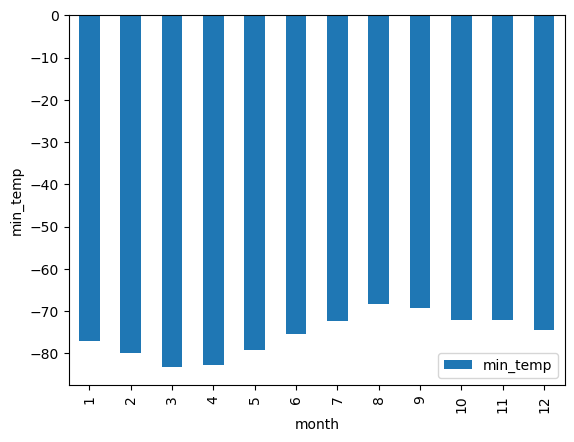

In [18]:
# Plot the average temperature by month

# meanMinTemp.plot(x='month',y='min_temp', kind = 'bar')
# plt.ylabel('min_temp')
# plt.title('Temperature over months')

meanMinTemp.plot(kind = 'bar', x = 'month', y = 'min_temp')
plt.xlabel('month')
plt.ylabel('min_temp')
plt.show()

In [19]:
# Identify the coldest and hottest months in Curiosity's location
minTemp = meanMinTemp['min_temp'].min()
coldestMonth = meanMinTemp.loc[meanMinTemp['min_temp'] == minTemp, 'month'].iloc[0]
coldestMonth

maxTemp = meanMinTemp['min_temp'].max()
hottestMonth = meanMinTemp.loc[meanMinTemp['min_temp'] == maxTemp, 'month'].iloc[0]
hottestMonth

print(f"Coldest months in Curiosity's location: {coldestMonth}")
print(f"Hottest months in Curiosity's location: {hottestMonth}")

Coldest months in Curiosity's location: 3
Hottest months in Curiosity's location: 8


In [20]:
# 4. Average pressure by Martian month
# print(temps_df.head(3))
monthGroup = temps_df.groupby('month').mean()
meanPressure = monthGroup['pressure'].reset_index('month')
print("Average pressure by Martian month")
print(meanPressure)

Average pressure by Martian month
    month    pressure
0       1  862.488506
1       2  889.455056
2       3  877.322917
3       4  806.329897
4       5  748.557047
5       6  745.054422
6       7  795.105634
7       8  873.829787
8       9  913.305970
9      10  887.312500
10     11  857.014493
11     12  842.156627


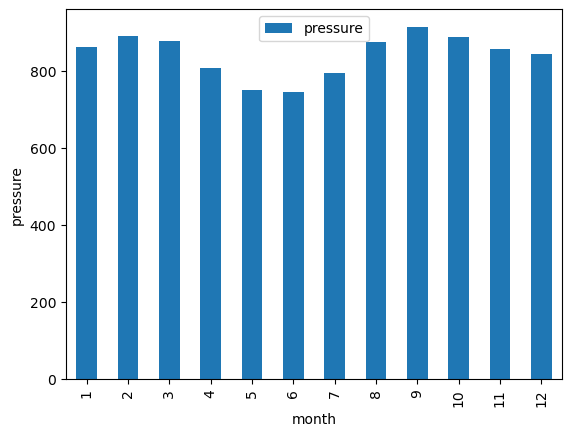

In [21]:
# Plot the average pressure by month
meanPressure.plot(kind = 'bar', x = 'month', y = 'pressure')
plt.xlabel('month')
plt.ylabel('pressure')
plt.show()

In [22]:
# 5. How many terrestrial (earth) days are there in a Martian year?


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [23]:
# Write the data to a CSV
temps_df.to_csv('MARS.csv', encoding='utf-8', index=False)

In [24]:
browser.quit()